In [1]:
import ast
from typing import Annotated, TypedDict


from langchain_community.tools import DuckDuckGoSearchRun
from langchain_core.messages import HumanMessage
from langchain_core.tools import tool
from langchain_openai import ChatOpenAI
from langgraph.graph import START, StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition

In [2]:
@tool
def calculator(query: str) -> str:
    '''계산기. 수식만 입력받습니다.'''
    return ast.literal_eval(query)




In [3]:
pip install -U duckduckgo-search

Note: you may need to restart the kernel to use updated packages.


In [4]:
search= DuckDuckGoSearchRun()

In [5]:
tools = [search, calculator]
model = ChatOpenAI(model = 'gpt-5-2025-08-07').bind_tools(tools)

In [6]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [7]:
builder = StateGraph(State)

In [8]:
def model_node(state: State) -> State:
    res = model.invoke(state['messages'])
    return {'messages': res}

In [9]:
builder.add_node('model', model_node)


In [10]:
builder.add_node('tools', ToolNode(tools))

In [11]:
builder.add_edge(START, 'model')
builder.add_conditional_edges('model', tools_condition)

In [12]:
builder.add_edge('tools', 'model')
graph = builder.compile()

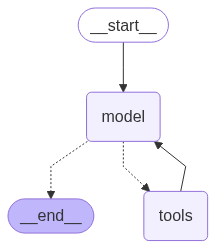

In [13]:
graph

In [16]:
input = {
    'messages' : [
        HumanMessage("서울 오늘 날씨는?")
    ]
}

In [17]:
graph.invoke(input)

/home/seorin0224/miniconda3/envs/openai/lib/python3.12/site-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:
/home/seorin0224/miniconda3/envs/openai/lib/python3.12/site-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:
/home/seorin0224/miniconda3/envs/openai/lib/python3.12/site-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:
/home/seorin0224/miniconda3/envs/openai/lib/python3.12/site-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` 

RateLimitError: Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-5 in organization org-AQeOiX5j6Vtl1XyLGo4RyVed on tokens per min (TPM): Limit 30000, Used 30000, Requested 5417. Please try again in 10.834s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}